In [1]:
# Libraries
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.style.use("seaborn-v0_8-whitegrid")
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 600

# Constants
random.seed(0)
np.random.seed(0)
tf = 60
dt = 0.01
N = round(tf/dt)
t = np.arange(0, tf, dt)

tspan = [0, tf]
c0 = [0, 0]
D = 0.0001

def solver(k1, k2, k3, k4, Ac, xi, c0, D):
    x = np.empty(N)
    y = np.empty(N)
    
    eta = np.random.normal(0, 1, N)
    
    x[0] = c0[0]
    y[0] = c0[1]
    
    for j in range(N-1):
        k1x = -k1*x[j] - k2*y[j] + Ac
        k1y = k3*x[j] - k4*y[j] + xi*Ac
        ax = x[j] + k1x*dt
        ax = ax + np.sqrt(2*D*dt)*eta[j]
        ay = y[j] + k1y*dt
        k2x = - k1*ax - k2*ay + Ac
        k2y = k3*ax - k4*ay + xi*Ac
        x[j+1] = x[j] + (k1x+k2x)*dt/2
        x[j+1] = x[j+1] + np.sqrt(2*D*dt)*eta[j]
        y[j+1] = y[j] + (k1y+k2y)*dt/2
    
    return x, y


# NFBL

In [2]:
# xi = 0

# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 1, 2, 0.05, 0.05, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4

# k4 has to be fixed as 1, therefor k1 also has to be fixed as 1

# We have 50000 curves in total, 25000 for NFBL and 25000 for IFFL
# We need 25 different curves, so 1000 curves for each, 25 different B, C, Q values
#total_curves = 50000
total_curves = 500
num_curves = int(total_curves/2)
different_curves = 25
num_params = int(num_curves/different_curves)


k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

In [3]:
# Solve the system for each pair of k2 and k3
t = np.arange(0, tf, dt)
t_shape = np.shape(t)[0]

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]

100%|██████████| 10/10 [00:00<00:00, 38.47it/s]


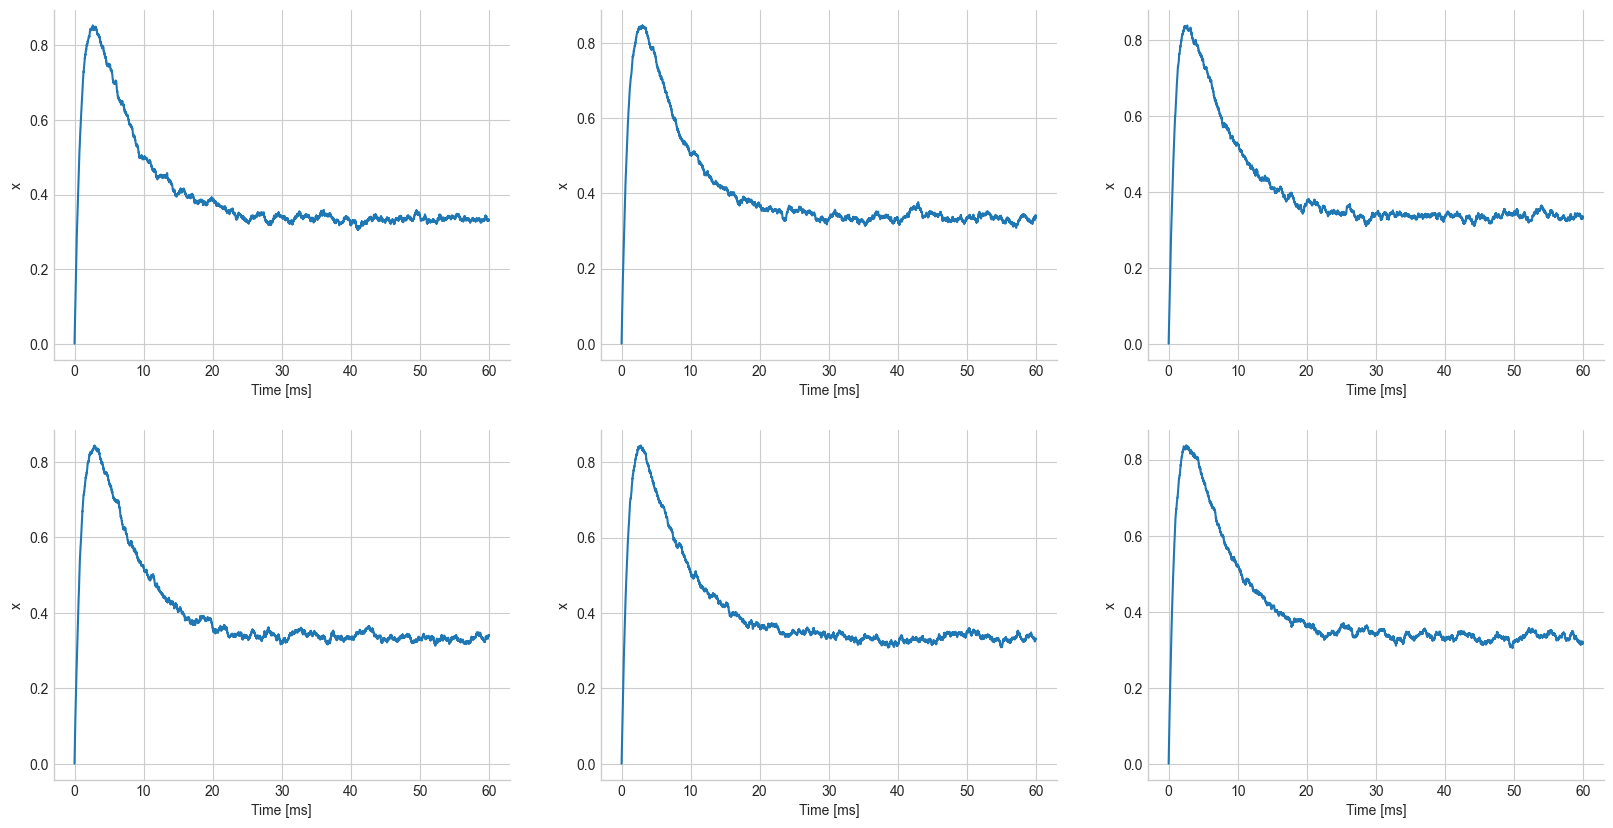

In [4]:
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

3.4025


100%|██████████| 10/10 [00:00<00:00, 40.15it/s]


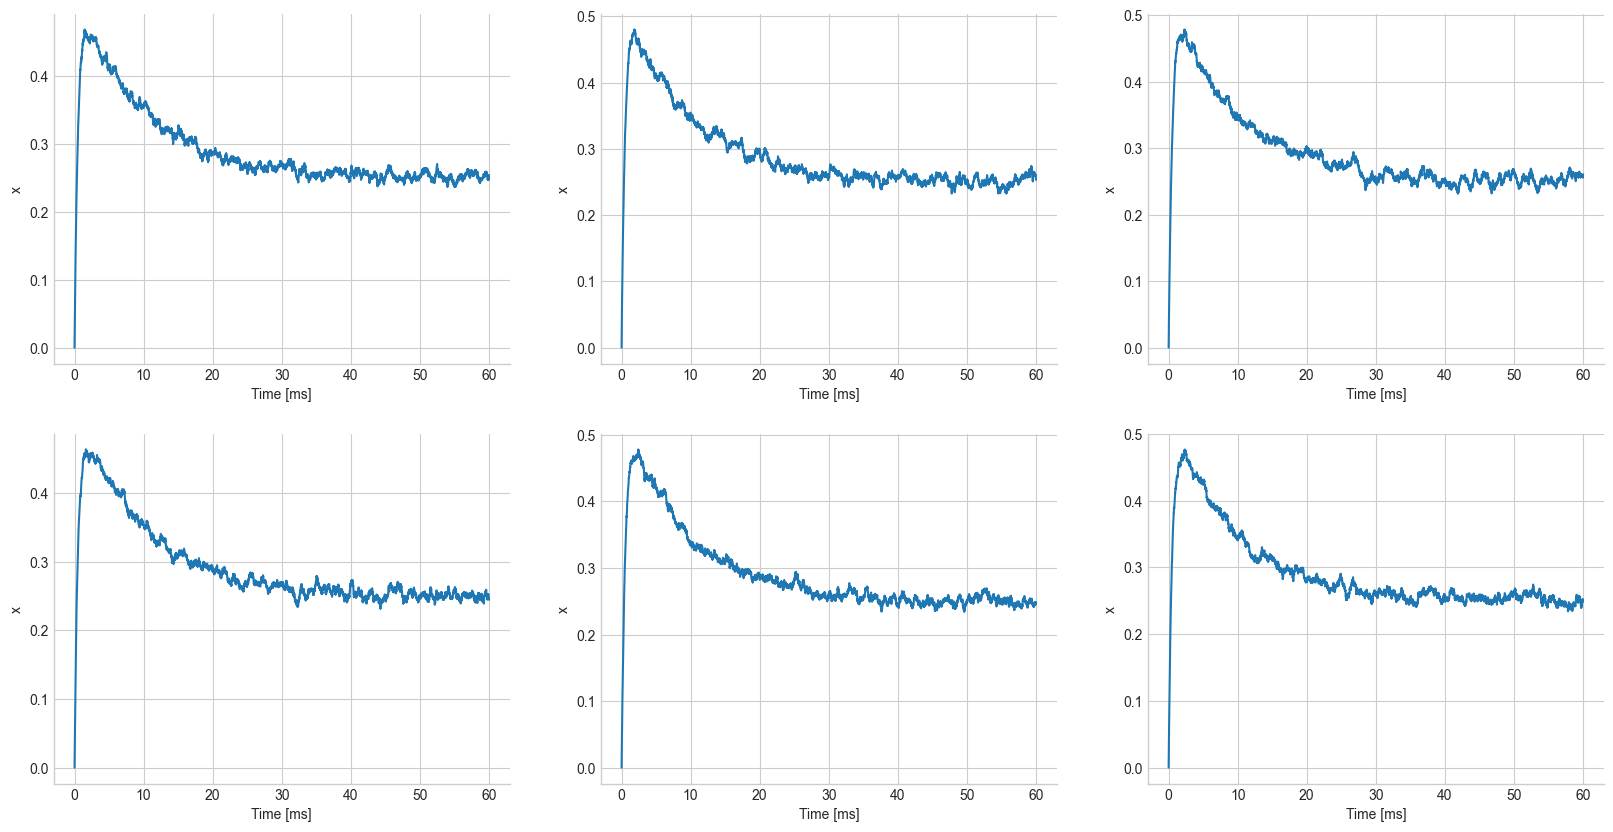

In [5]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 2, 2, 0.05, 0.05, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

3.0024999999999995


100%|██████████| 10/10 [00:00<00:00, 35.83it/s]


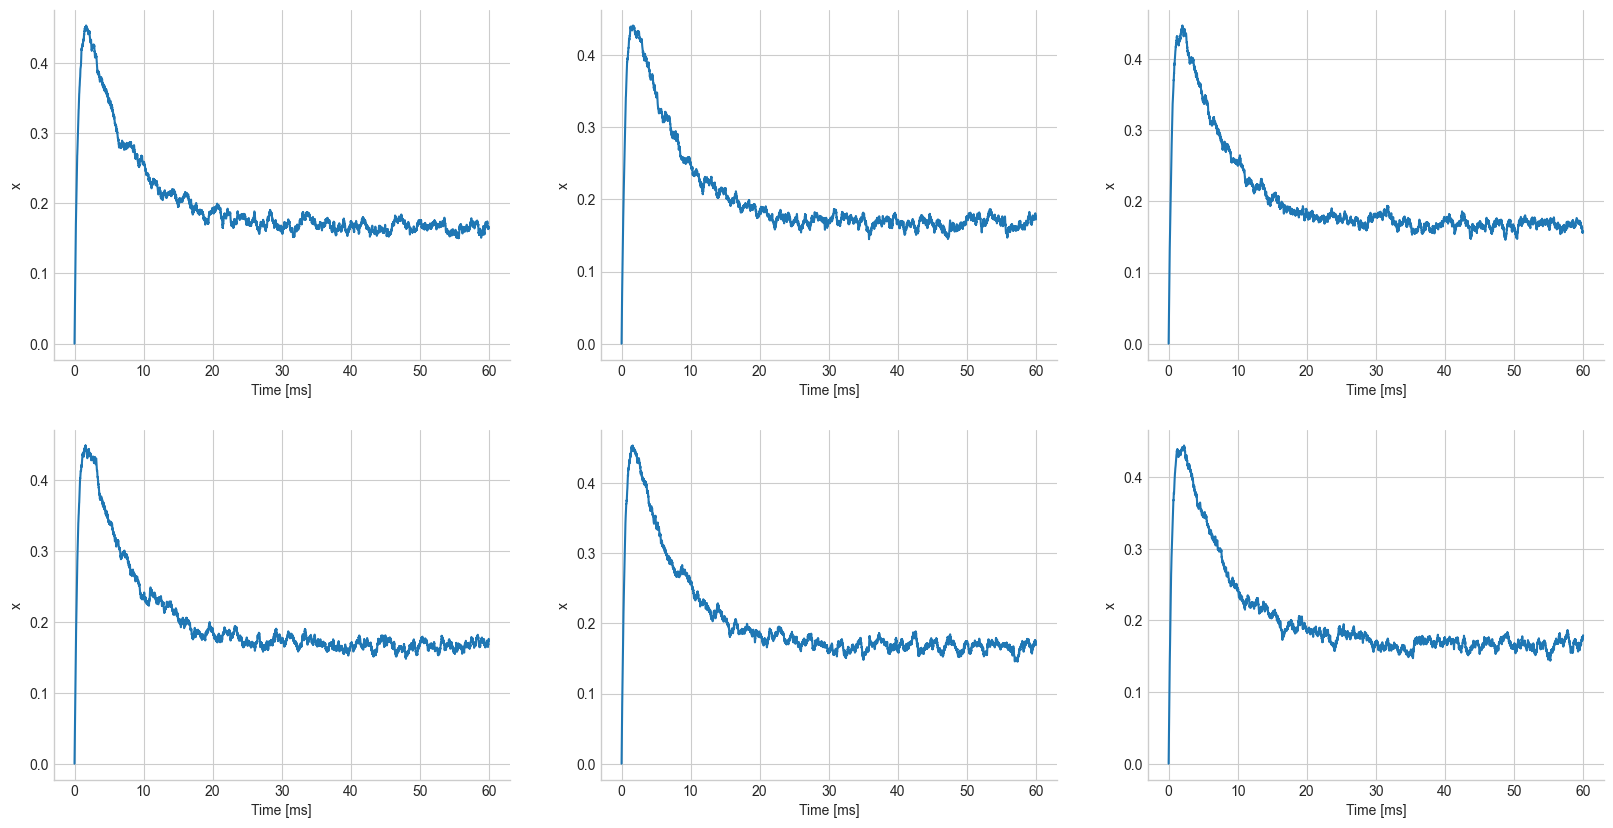

In [6]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 2, 2, 0.1, 0.05, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.5025


100%|██████████| 10/10 [00:00<00:00, 38.72it/s]


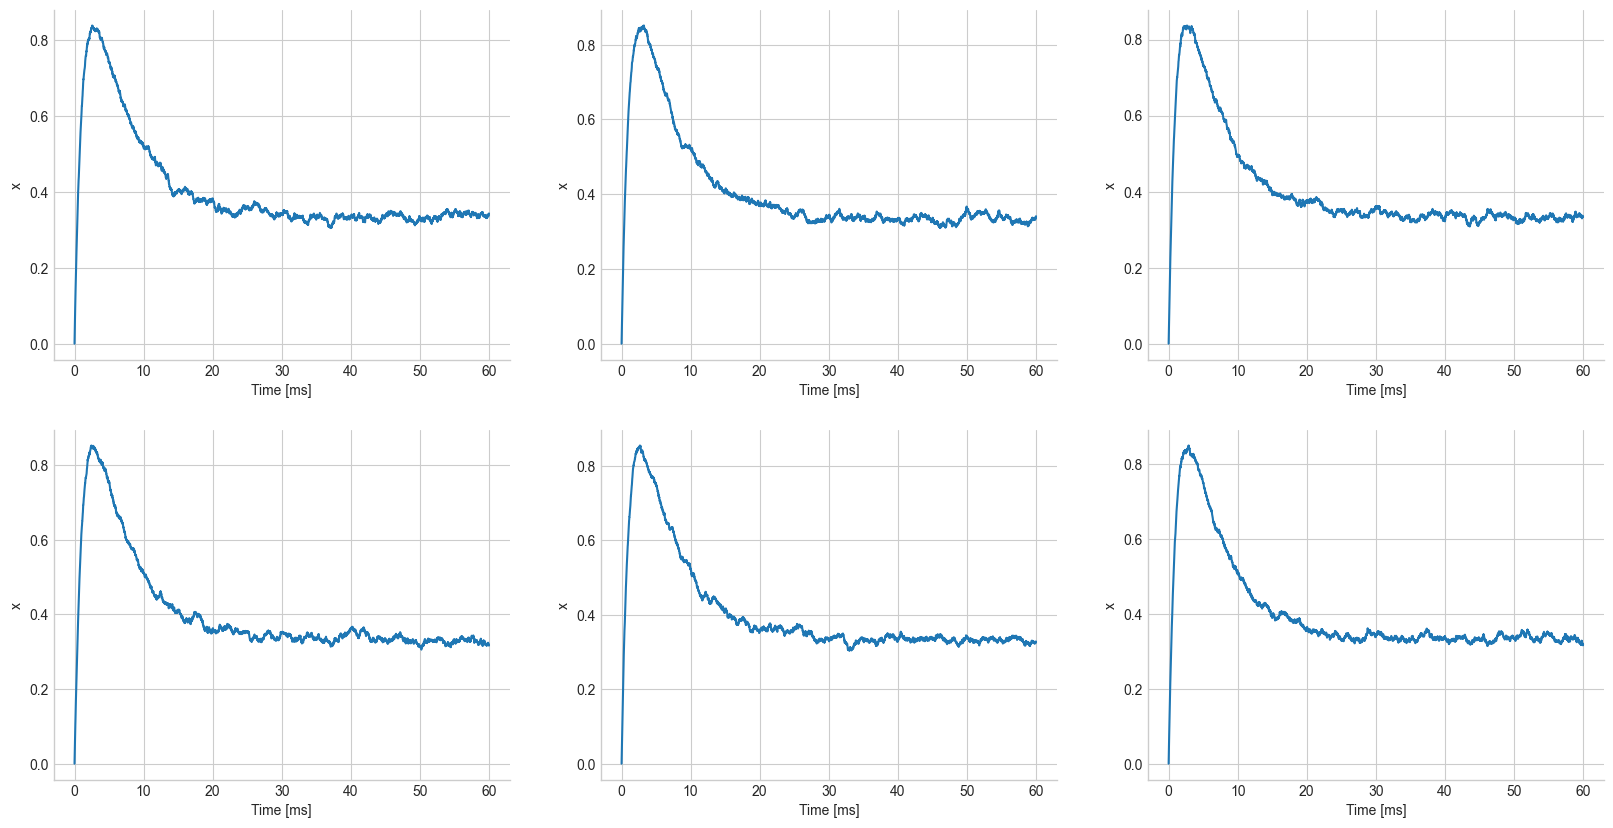

In [7]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 1, 1, 0.1, 0.05, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.0025000000000000022


100%|██████████| 10/10 [00:00<00:00, 40.51it/s]


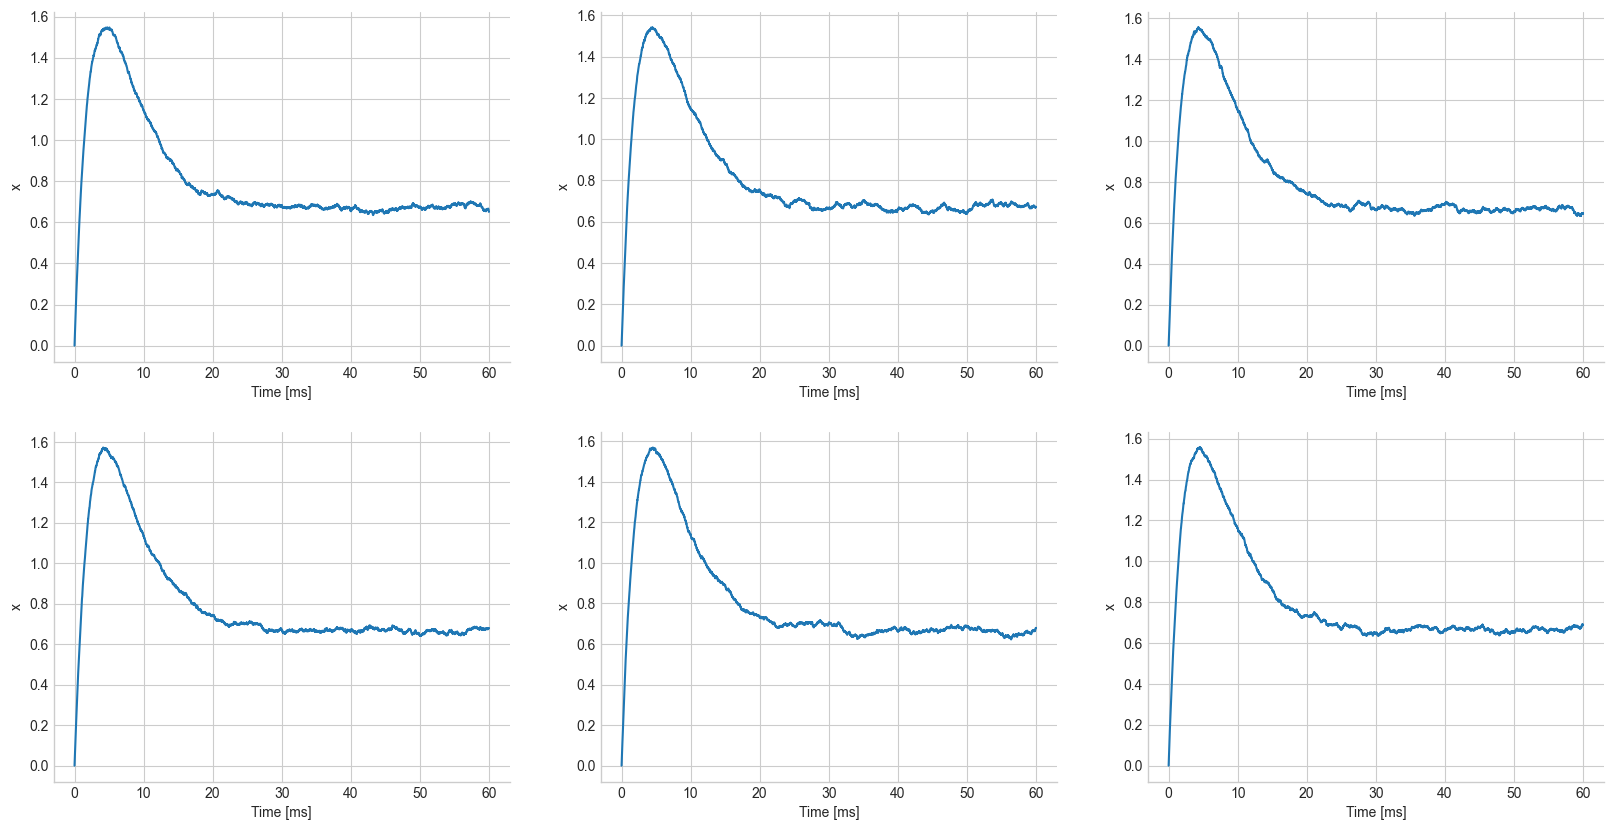

In [8]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.5, 0.5, 0.1, 0.05, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.41000000000000014


100%|██████████| 10/10 [00:00<00:00, 39.99it/s]


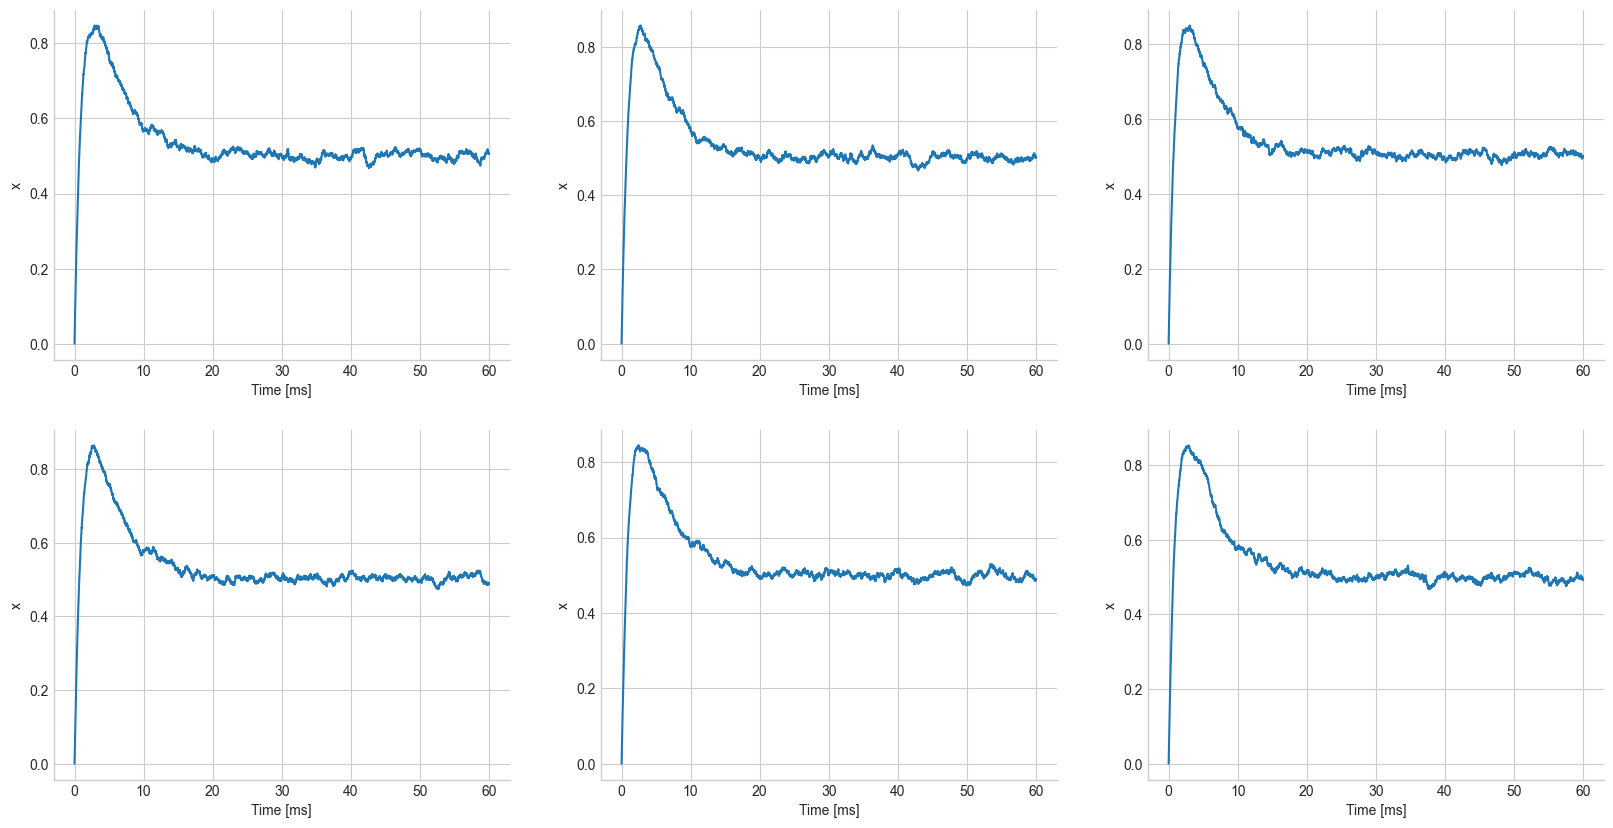

In [9]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 1, 1, 0.1, 0.1, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.10250000000000004


100%|██████████| 10/10 [00:00<00:00, 38.74it/s]


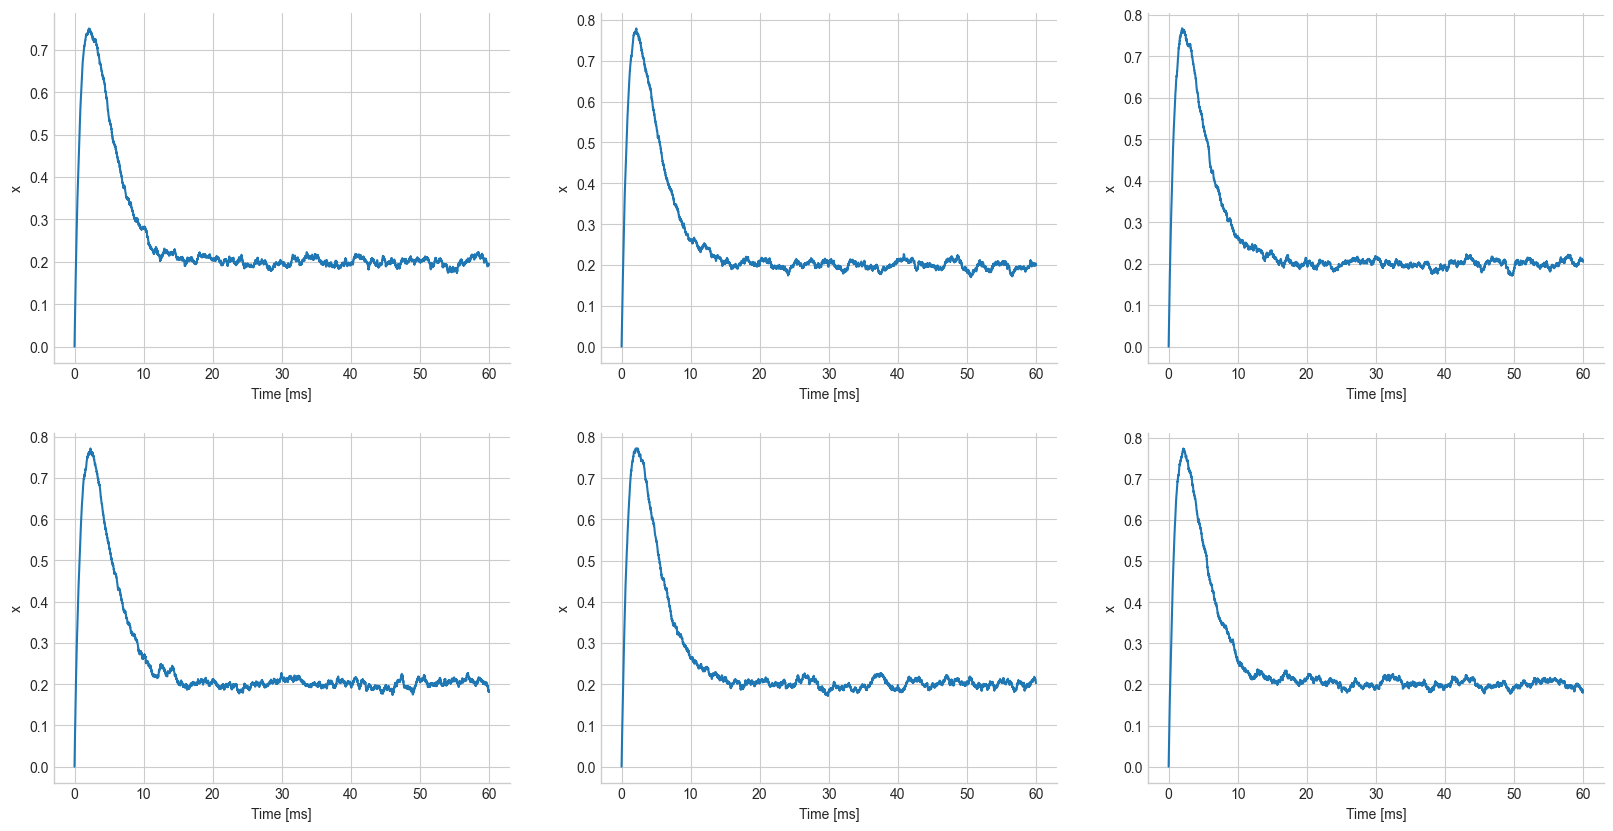

In [10]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 1, 2, 0.1, 0.05, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.31000000000000016


100%|██████████| 10/10 [00:00<00:00, 31.03it/s]


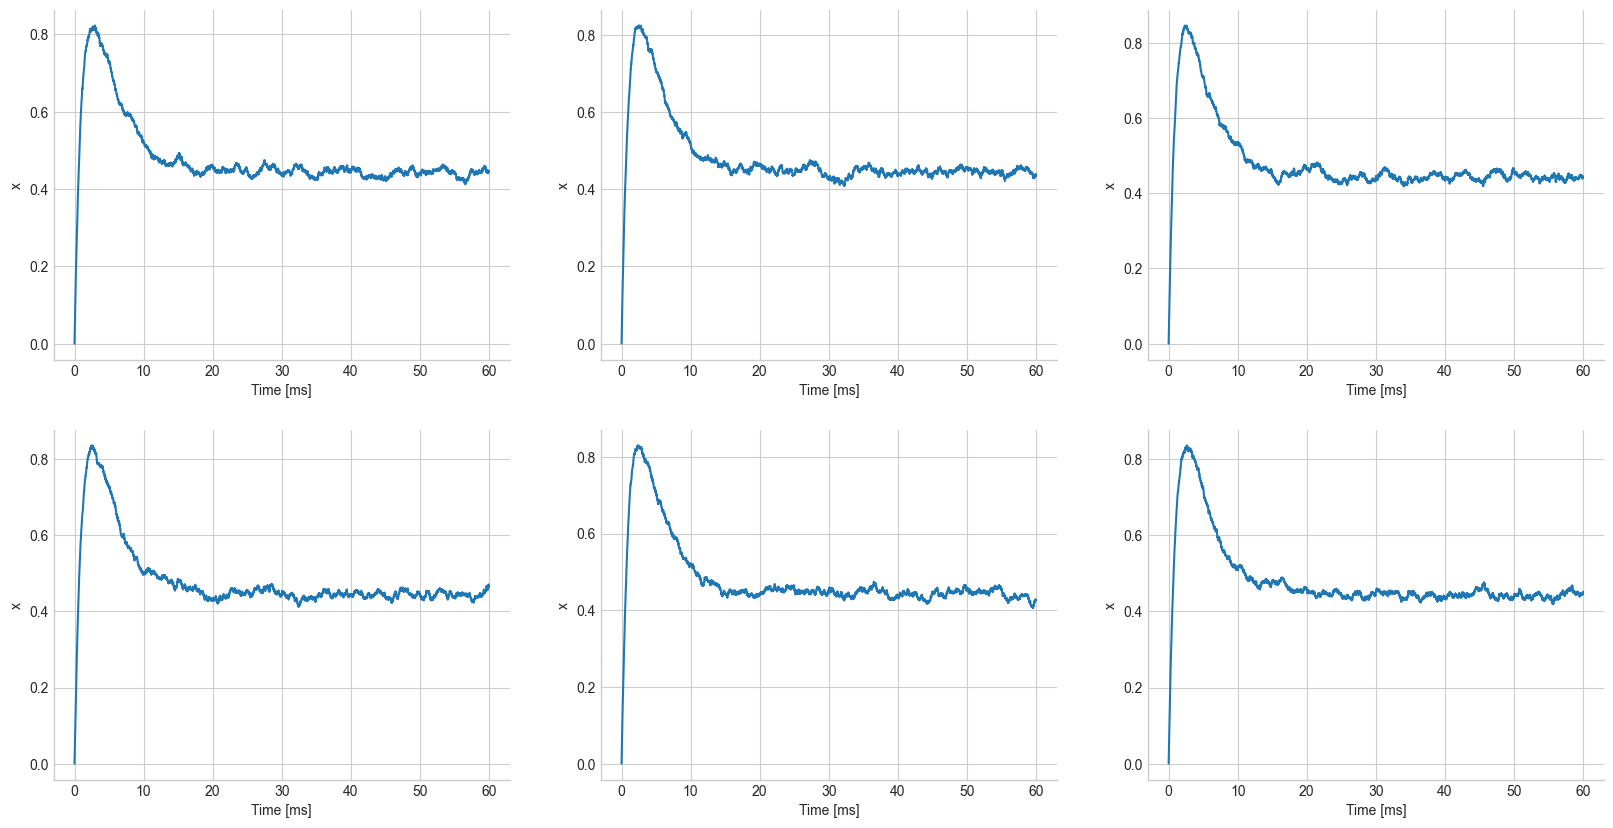

In [11]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 1, 1.25, 0.1, 0.1, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

8.302499999999998


100%|██████████| 10/10 [00:00<00:00, 38.45it/s]


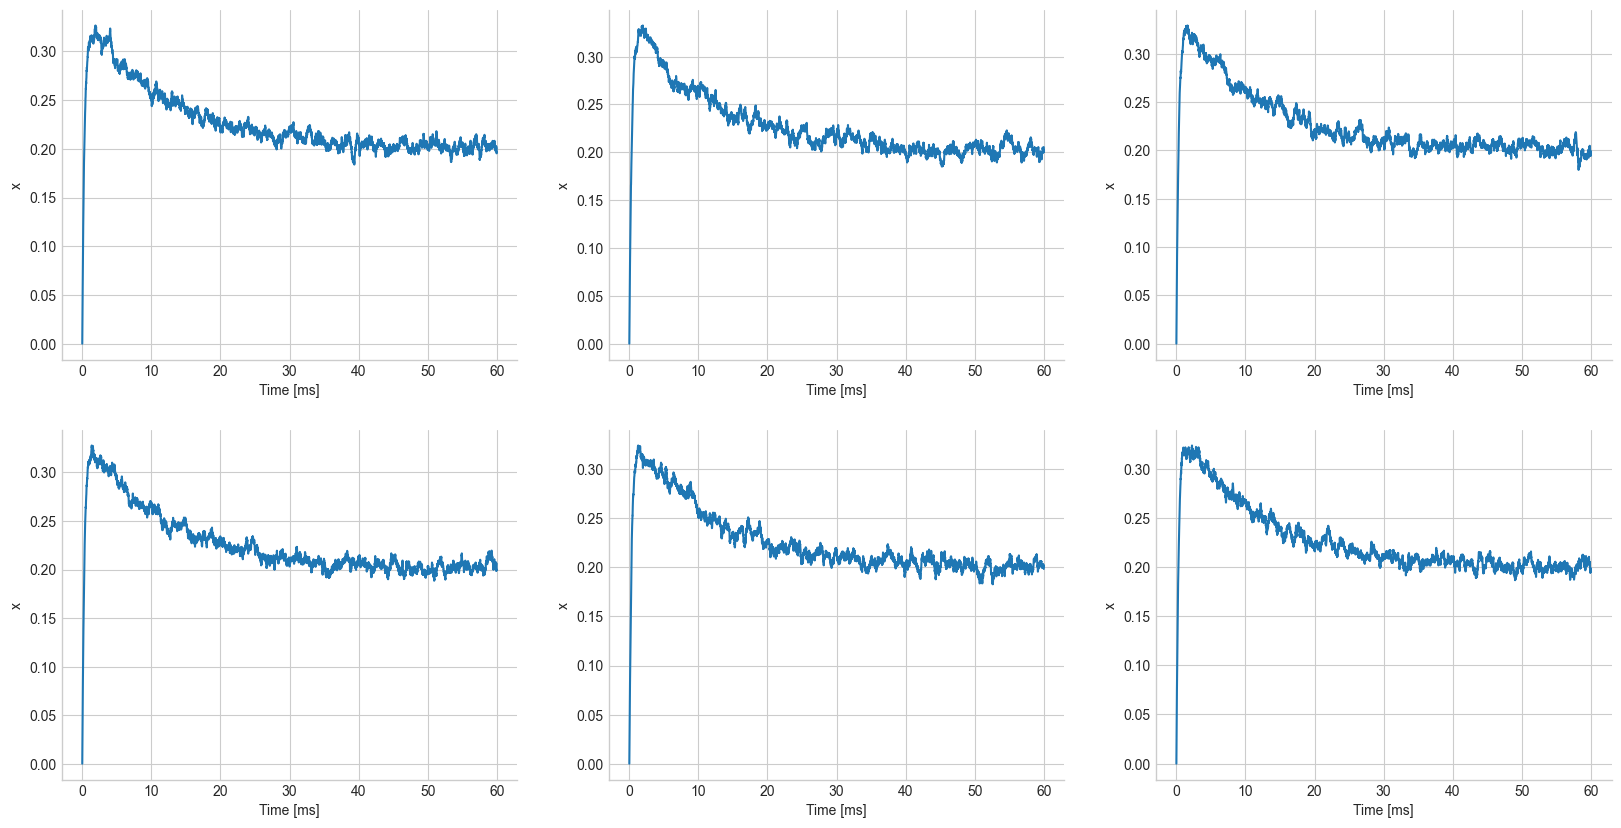

In [12]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 3, 1, 0.1, 0.05, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.1924999999999999


100%|██████████| 10/10 [00:00<00:00, 38.19it/s]


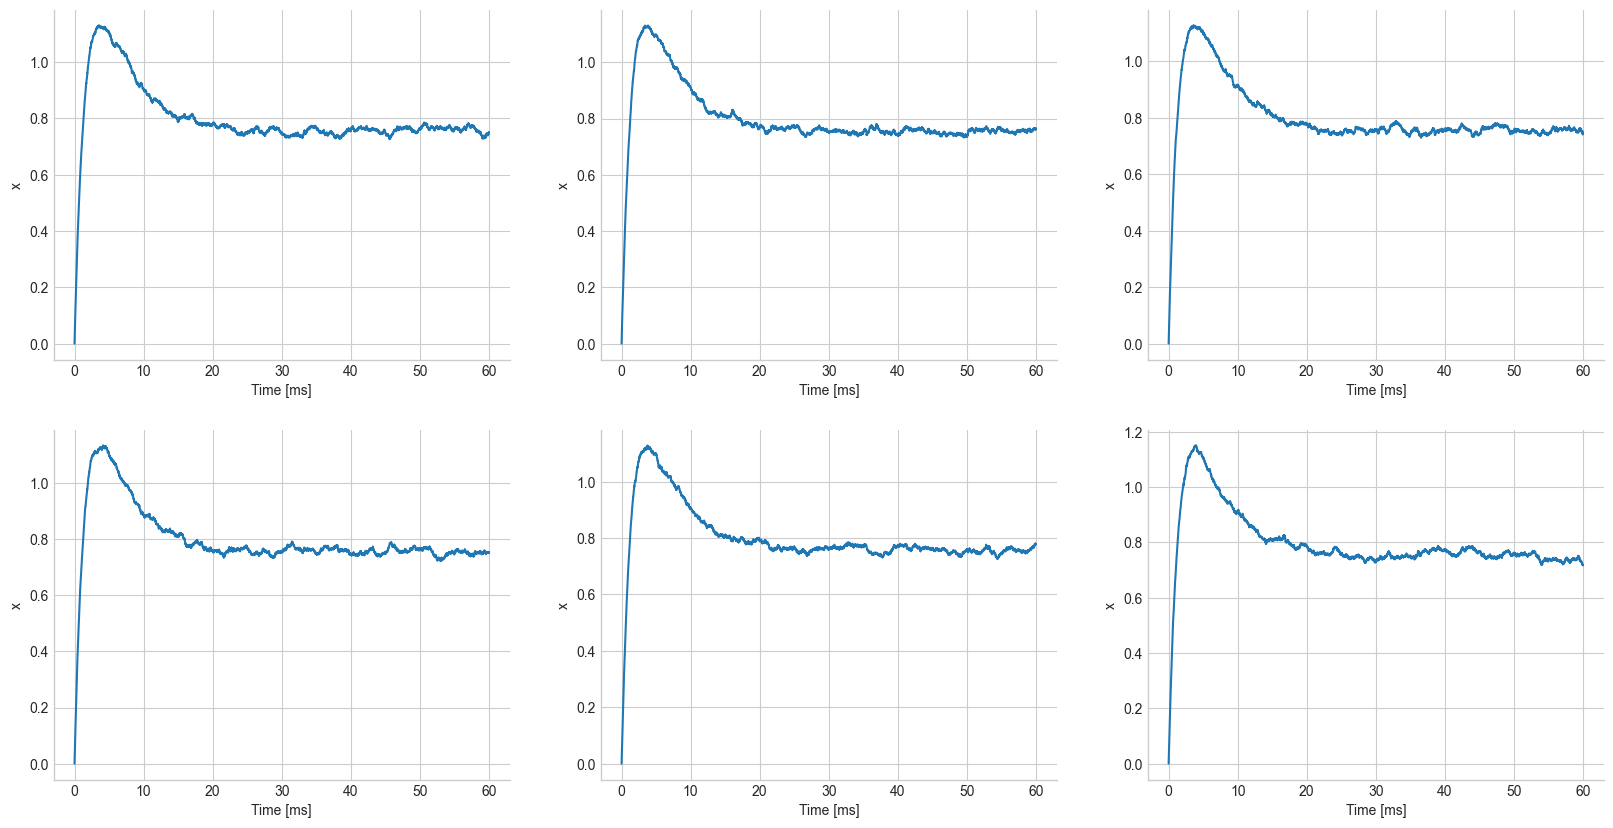

In [13]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.75, 1.15, 0.05, 0.1, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.3600000000000001


100%|██████████| 10/10 [00:00<00:00, 40.46it/s]


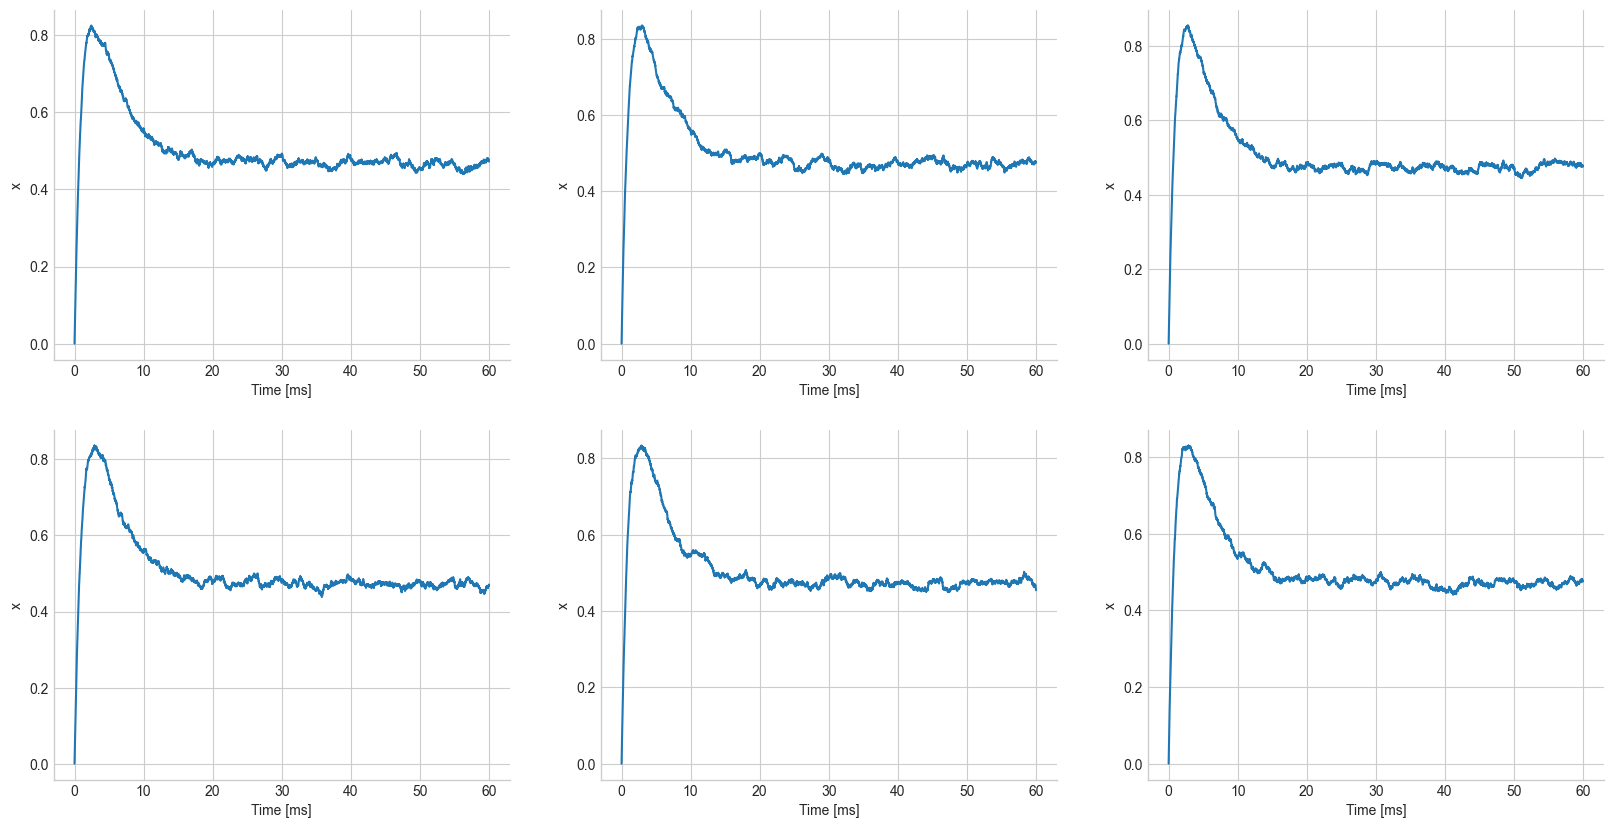

In [14]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 1, 2.25, 0.05, 0.1, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.41000000000000014


100%|██████████| 10/10 [00:00<00:00, 32.25it/s]


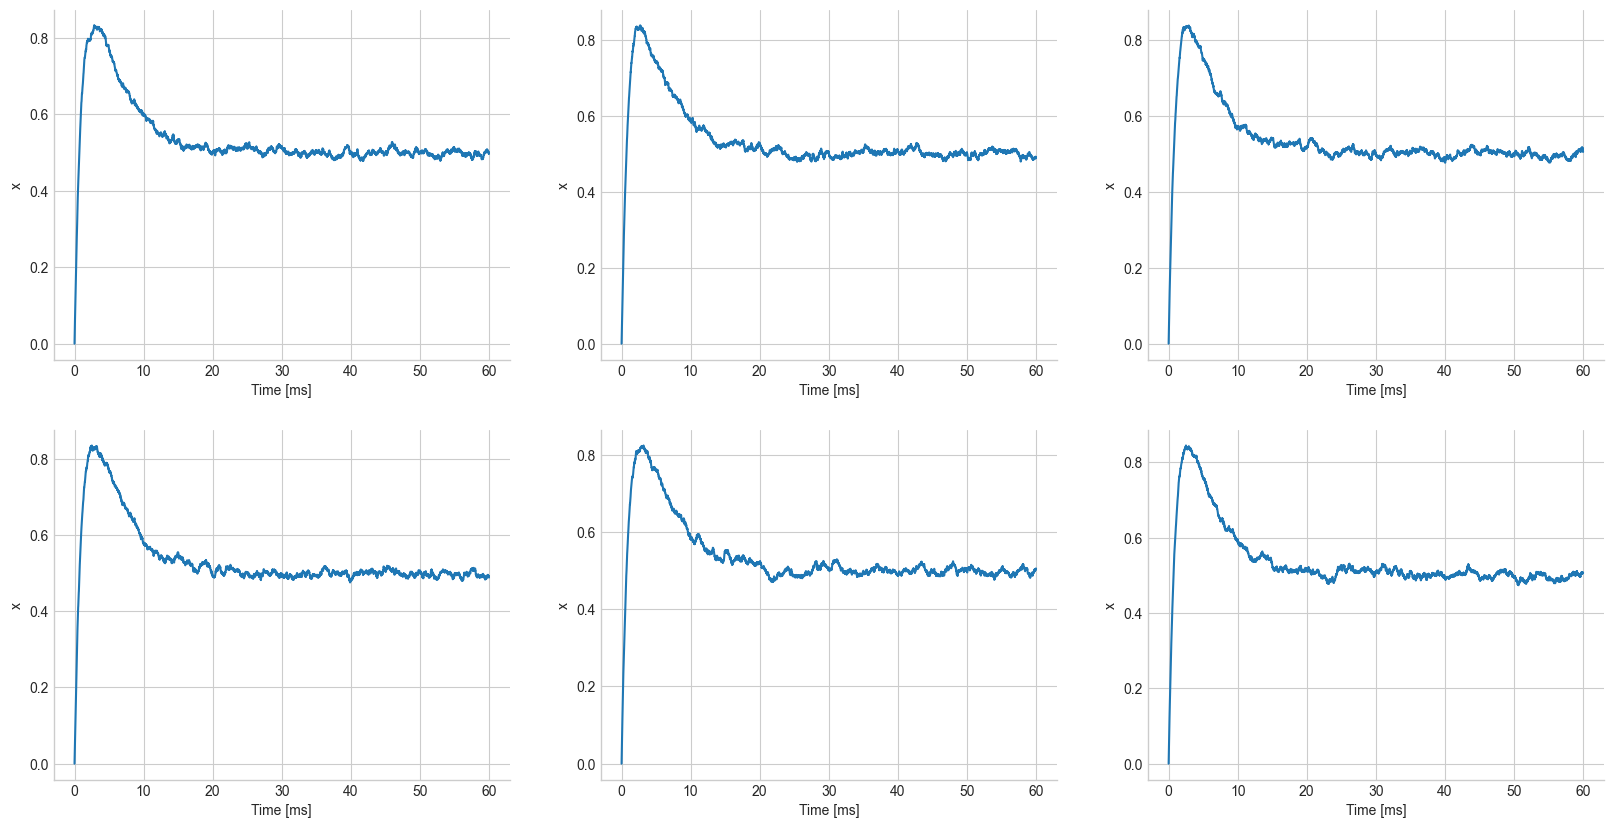

In [15]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 1, 0.5, 0.2, 0.1, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.022499999999999853


100%|██████████| 10/10 [00:00<00:00, 28.26it/s]


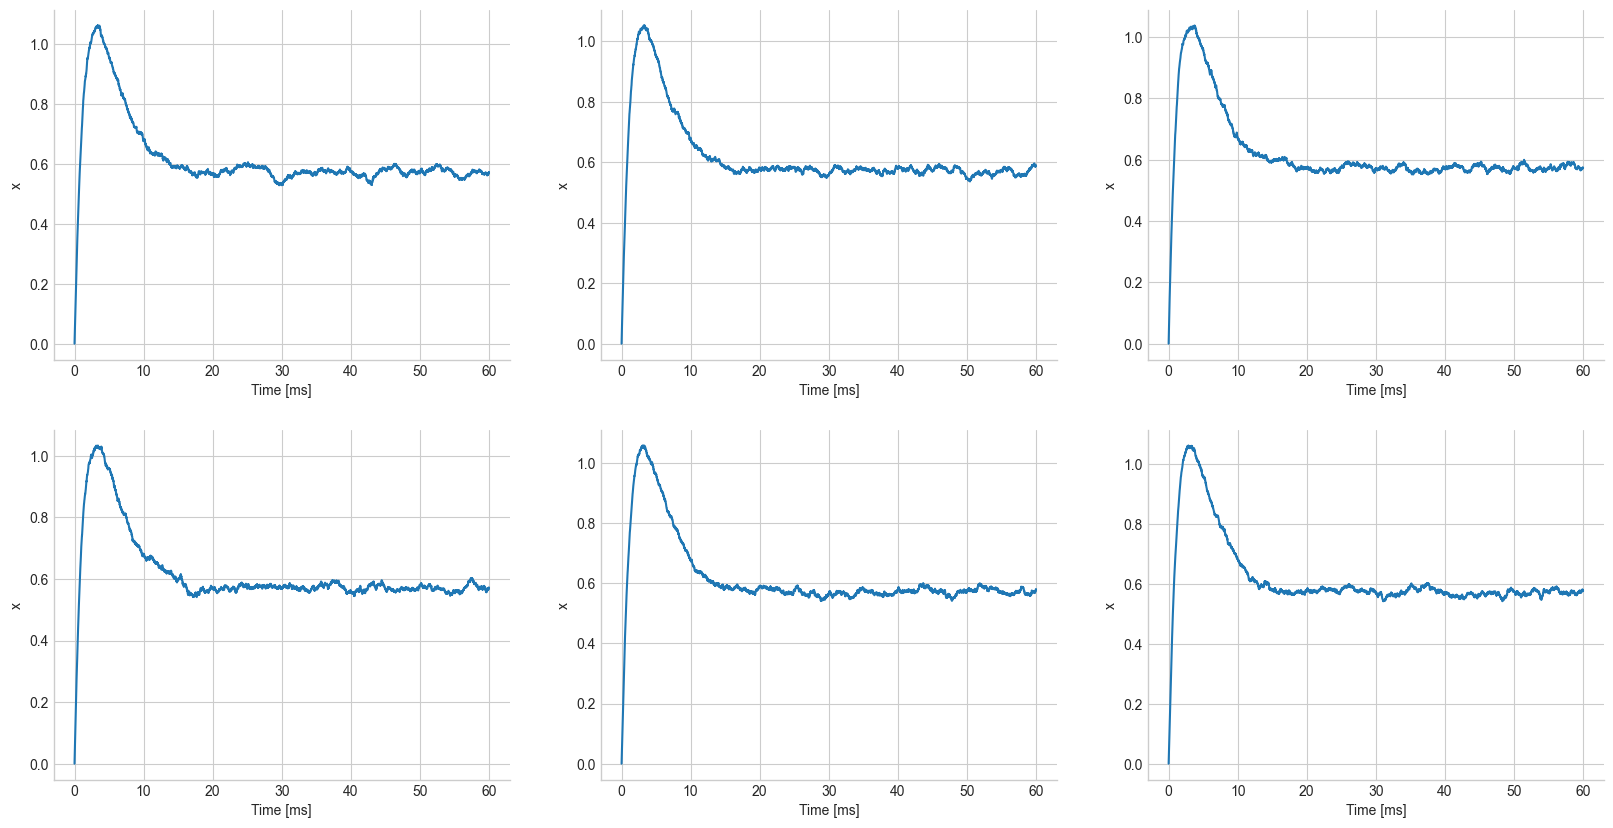

In [28]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.75, 0.2, 0.5, 0.1, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.9599999999999997


100%|██████████| 10/10 [00:00<00:00, 39.02it/s]


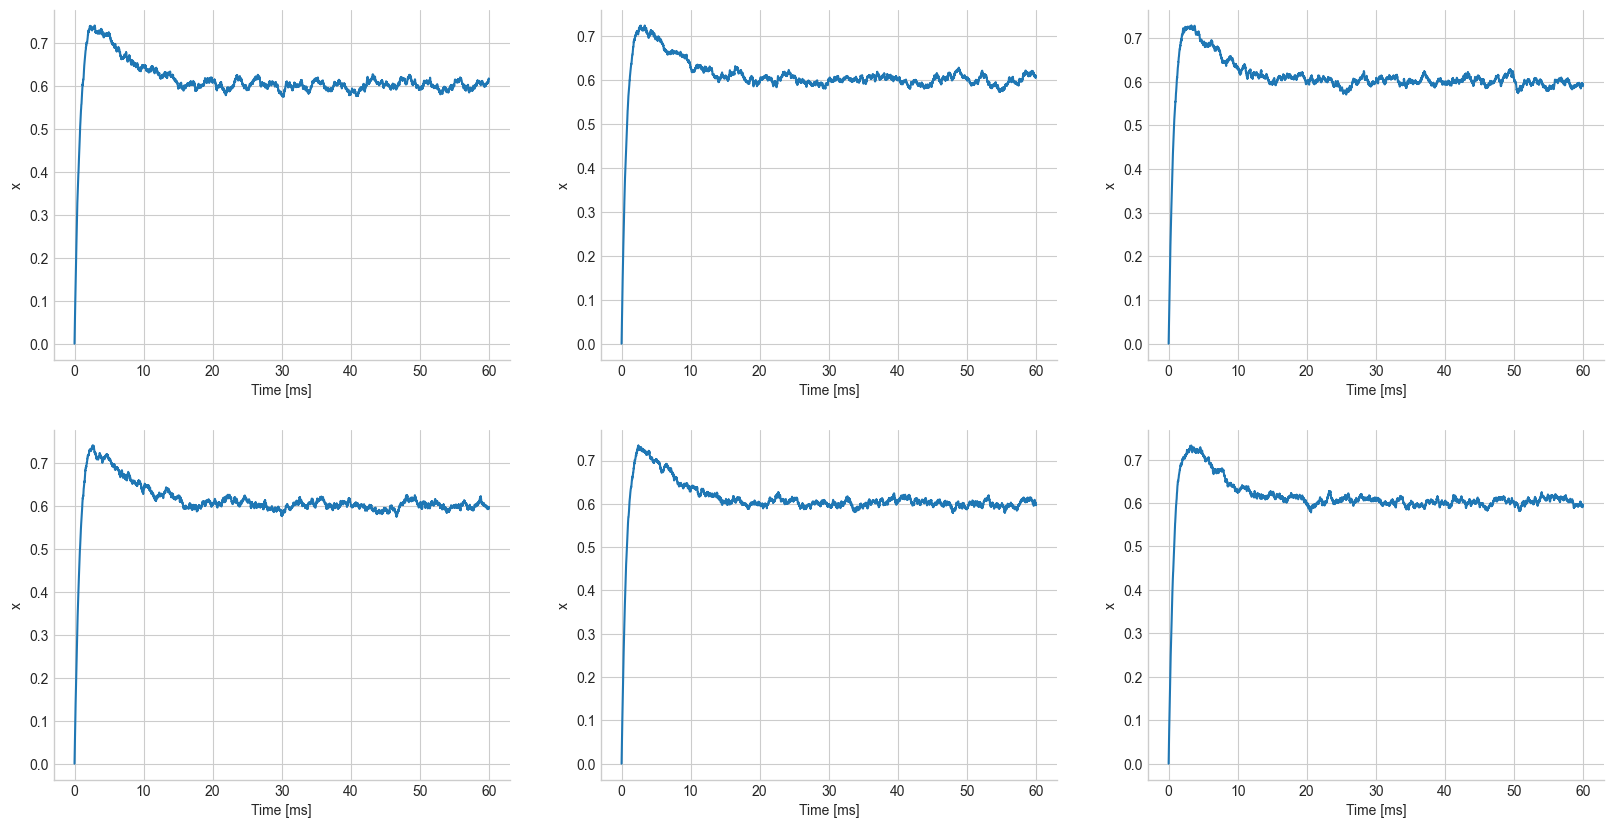

In [17]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 1.25, 0.25, 0.25, 0.15, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.4425000000000001


100%|██████████| 10/10 [00:00<00:00, 38.67it/s]


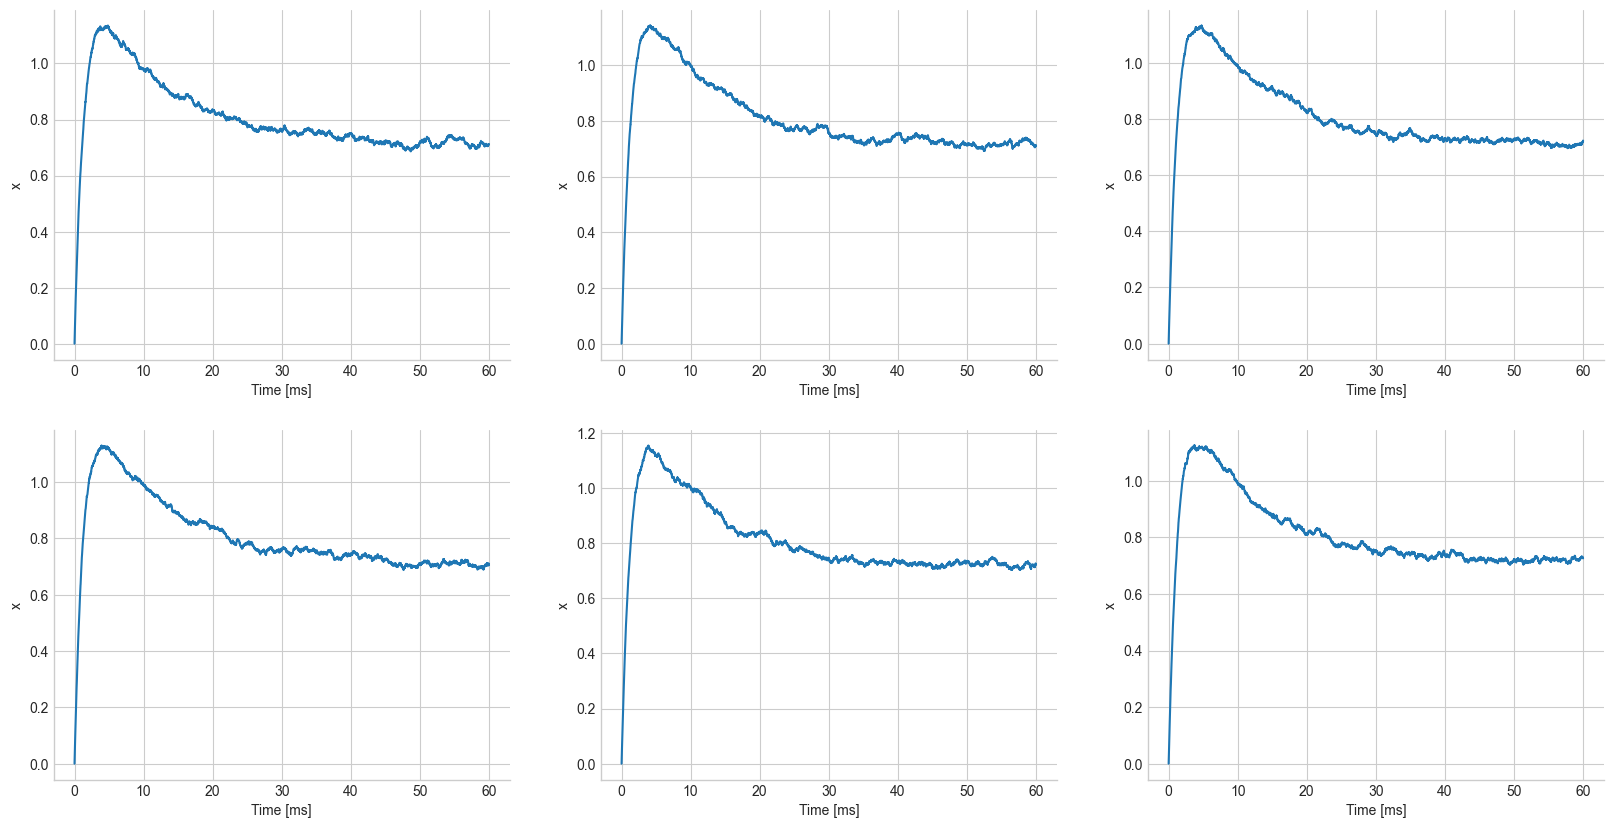

In [41]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.8, 3, 0.01, 0.05, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.10249999999999998


100%|██████████| 10/10 [00:00<00:00, 30.35it/s]


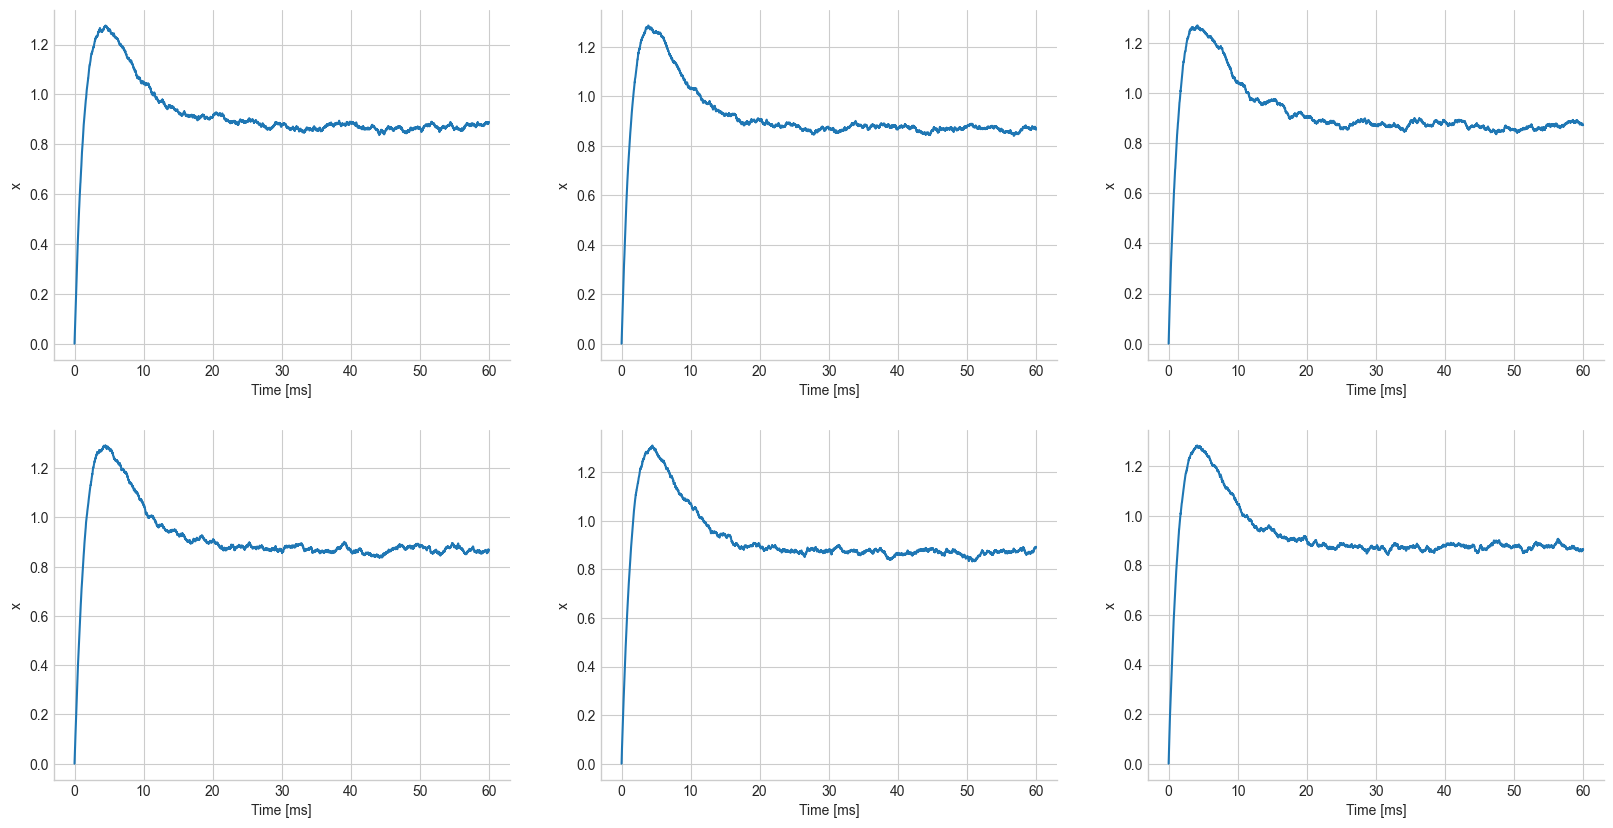

In [42]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.65, 1, 0.05, 0.1, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.1601


100%|██████████| 10/10 [00:00<00:00, 39.94it/s]


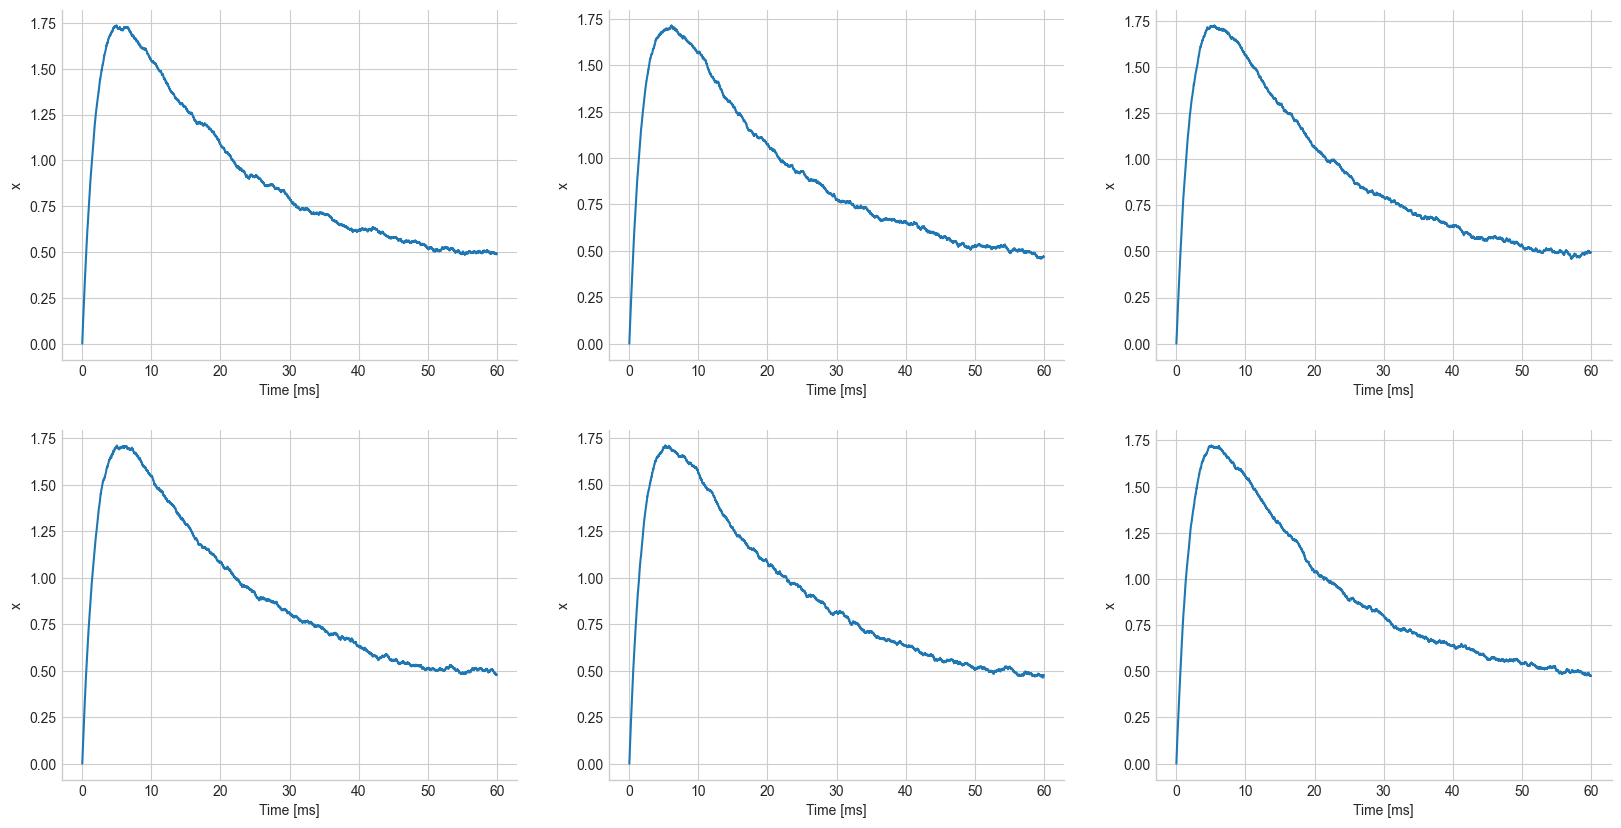

In [20]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.5, 2, 0.01, 0.01, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.004100000000000006


100%|██████████| 10/10 [00:00<00:00, 37.38it/s]


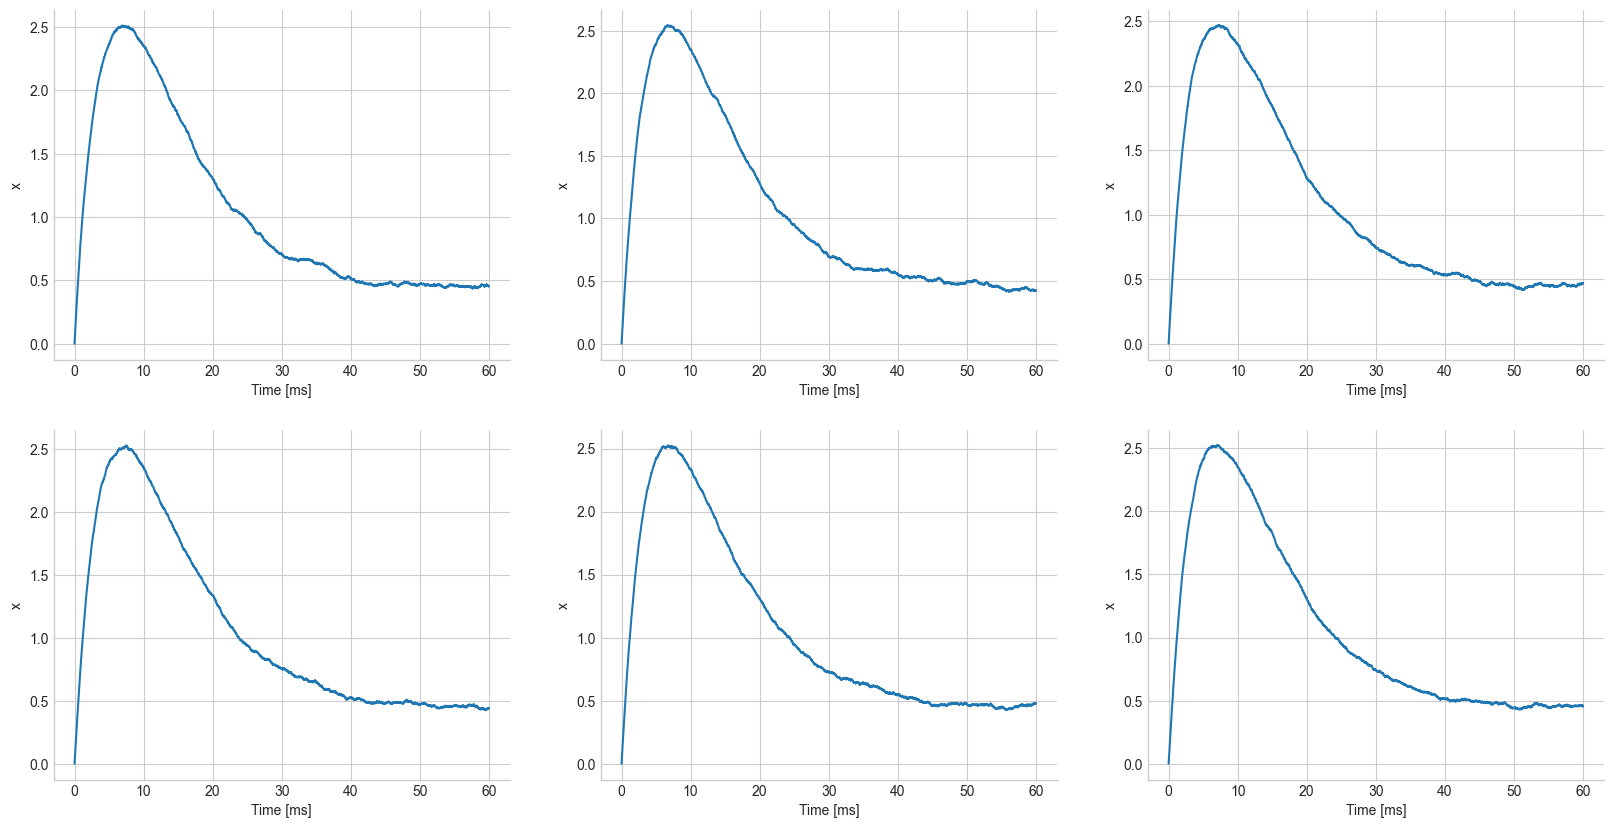

In [43]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.3, 2, 0.01, 0.01, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.0401


100%|██████████| 10/10 [00:00<00:00, 28.37it/s]


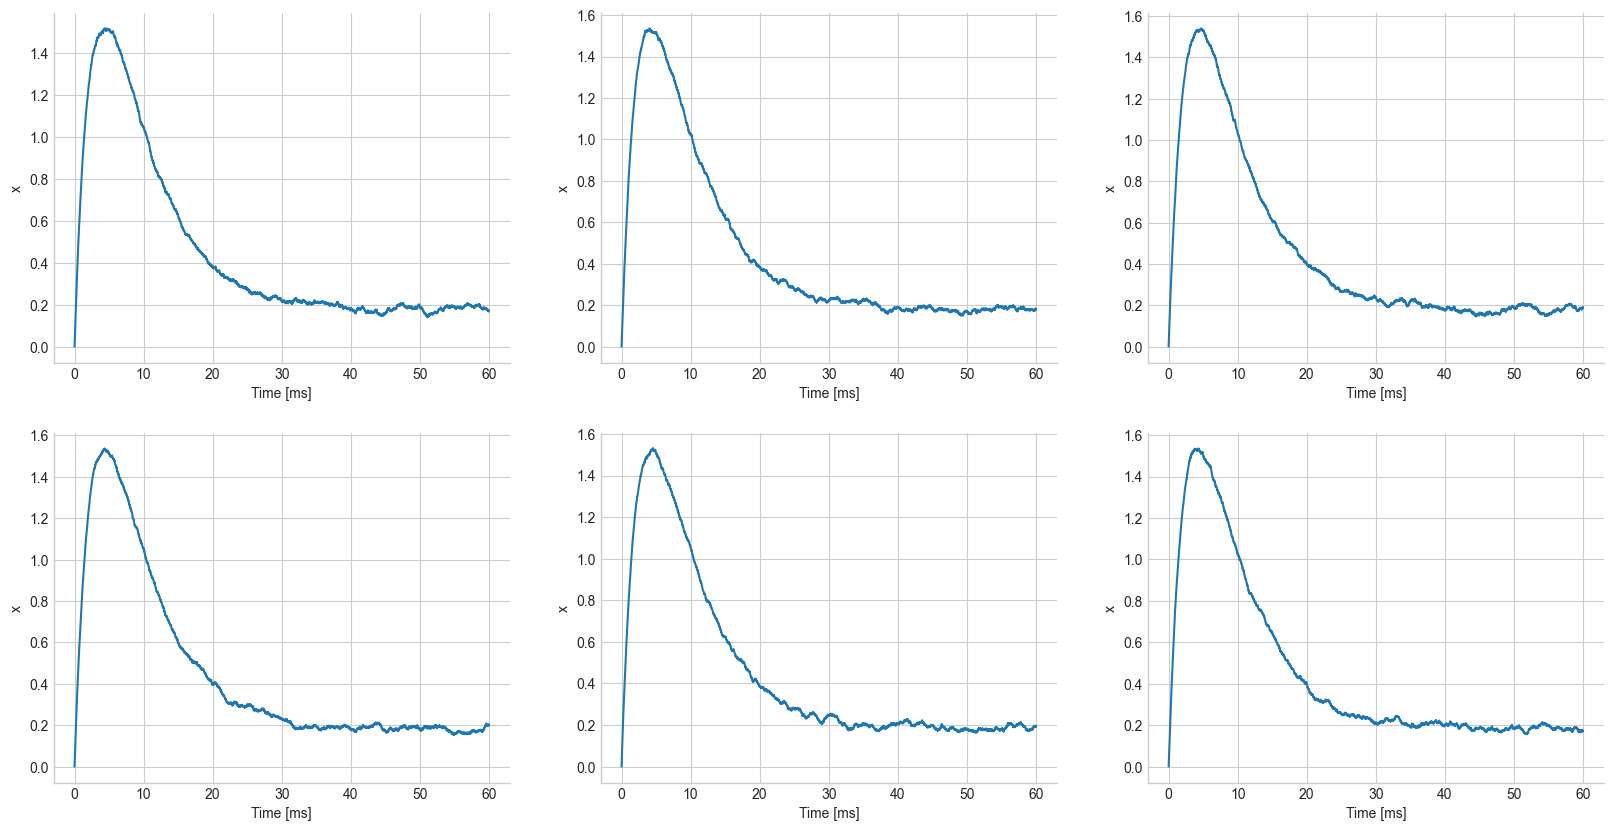

In [22]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.5, 1, 0.05, 0.01, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.041600000000000026


100%|██████████| 10/10 [00:00<00:00, 39.05it/s]


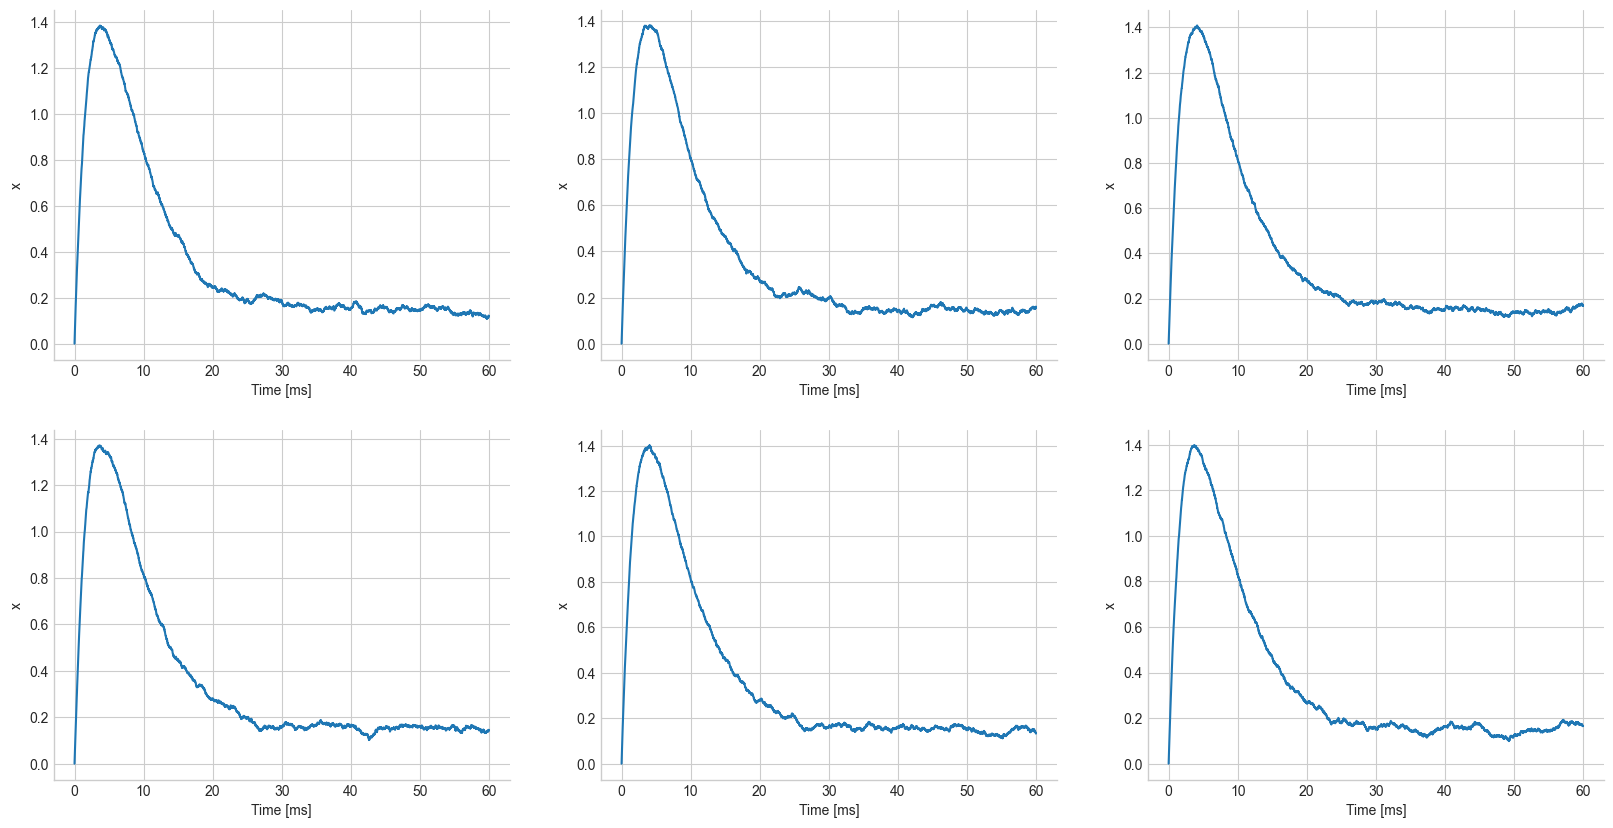

In [45]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.55, 1.25, 0.05, 0.01, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.14759999999999995


100%|██████████| 10/10 [00:00<00:00, 39.63it/s]


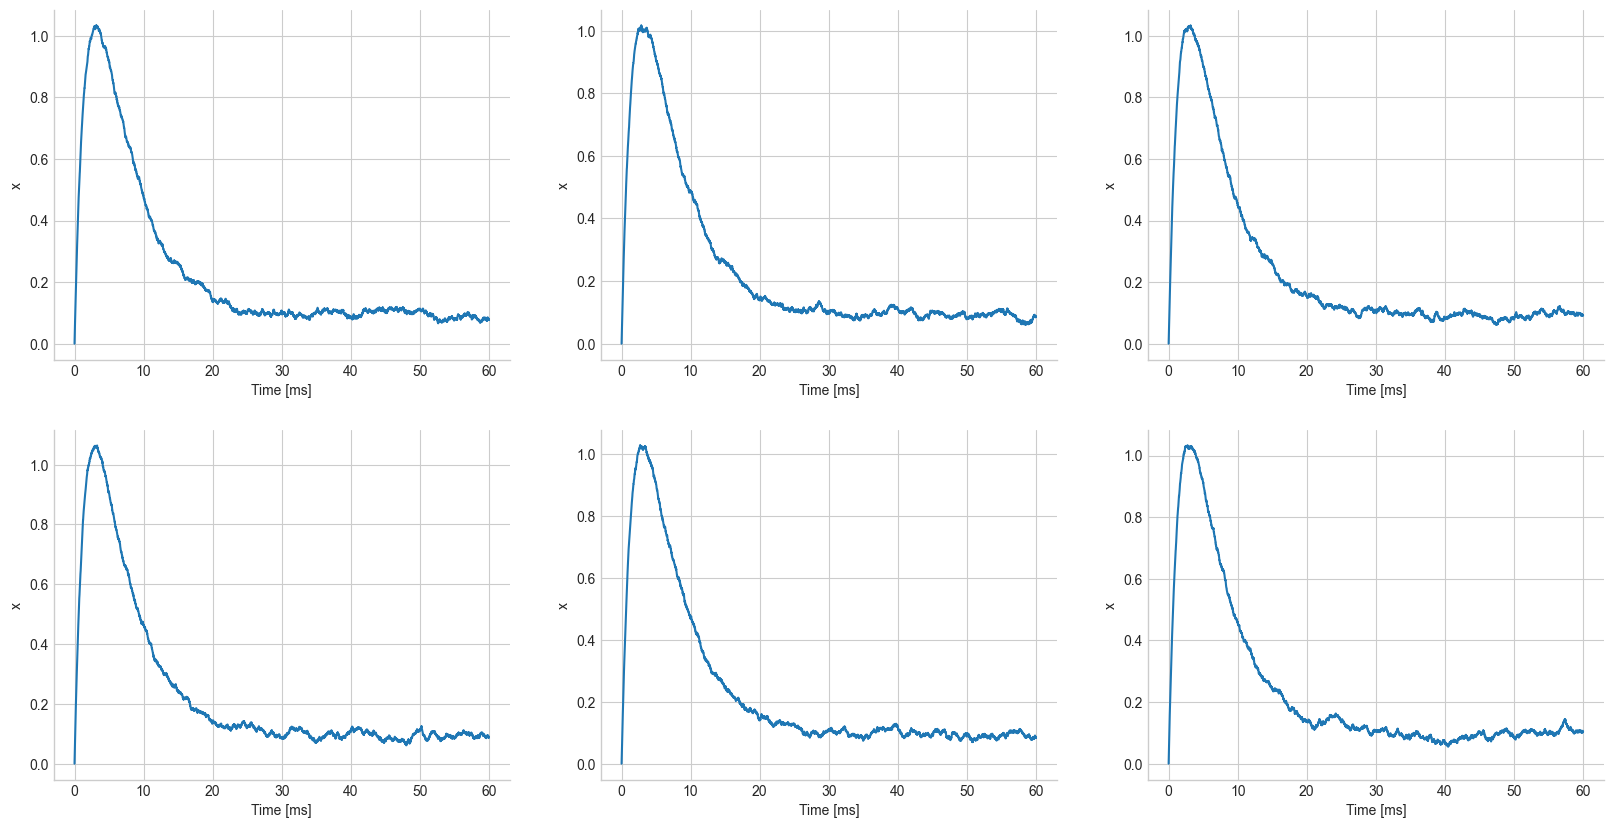

In [24]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.75, 2, 0.05, 0.01, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.02999999999999997


100%|██████████| 10/10 [00:00<00:00, 38.89it/s]


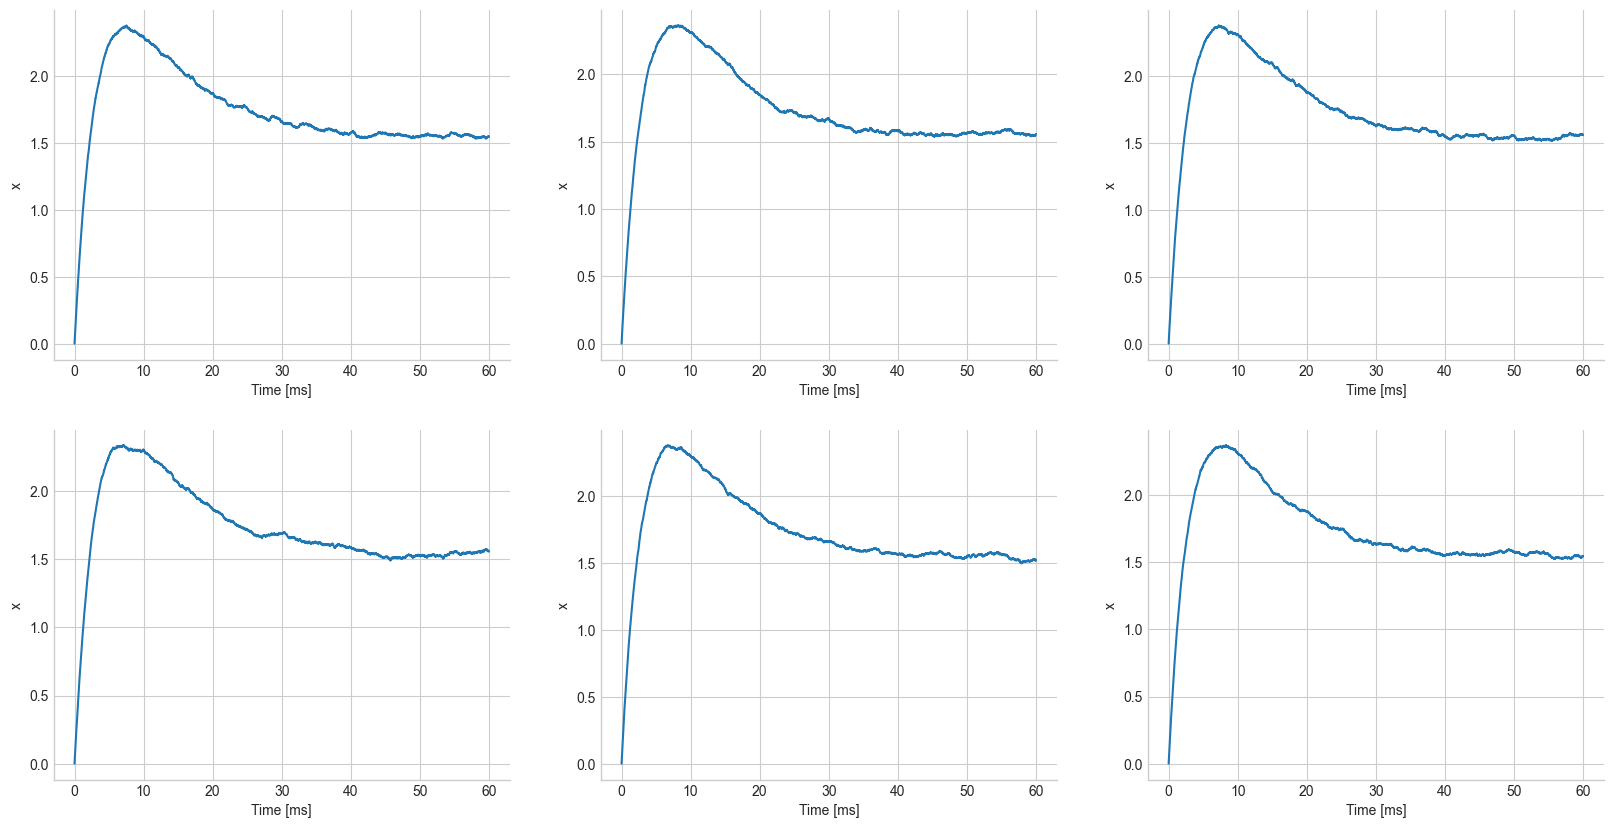

In [46]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.35, 1.5, 0.01, 0.05, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.0050000000000000044


100%|██████████| 10/10 [00:00<00:00, 29.81it/s]


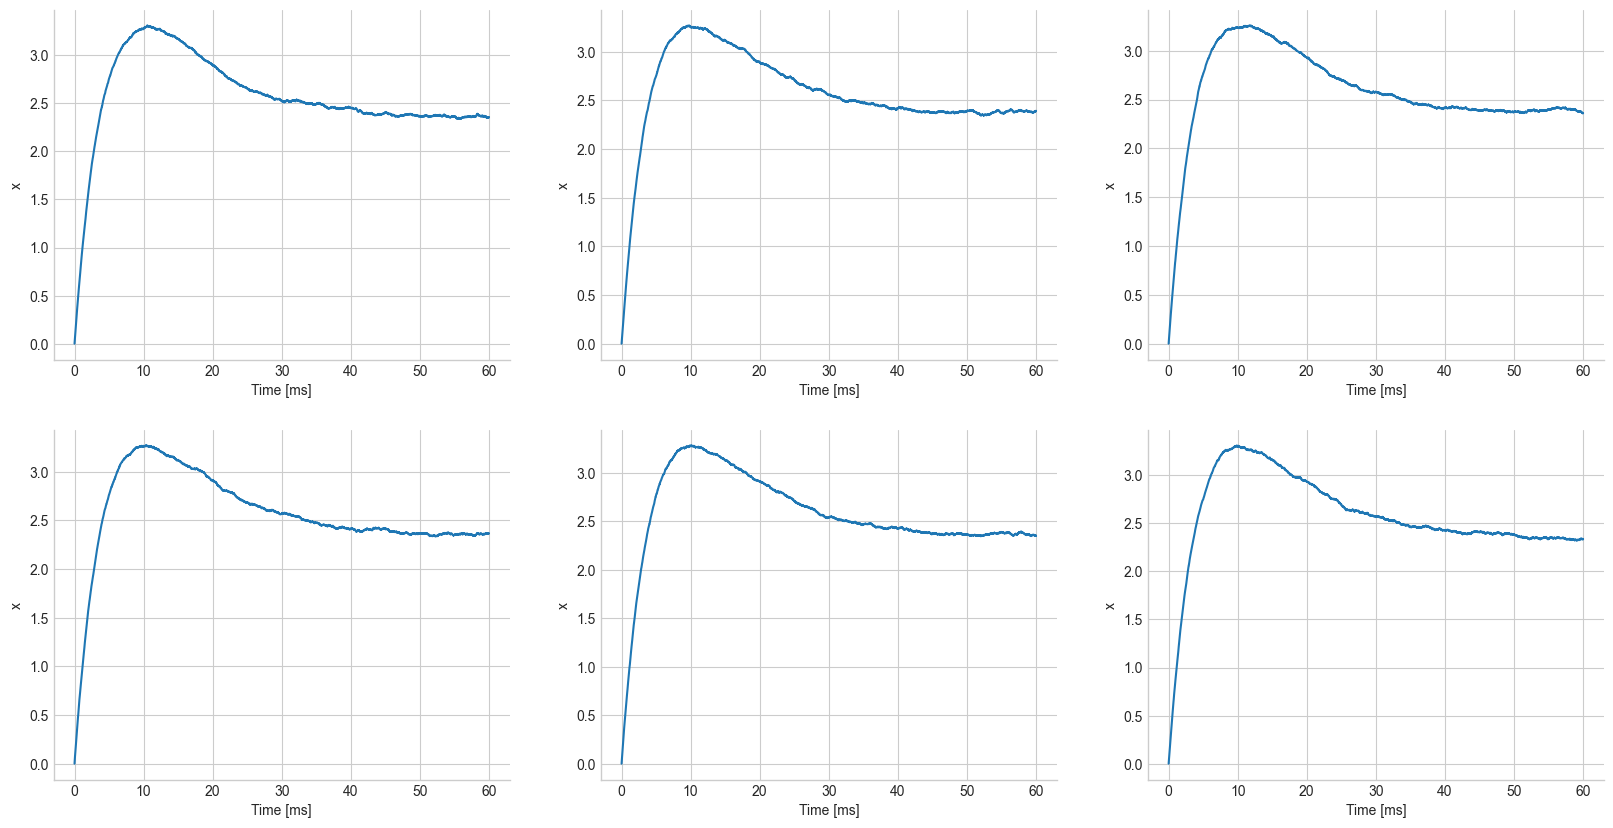

In [72]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.25, 0.35, 0.025, 0.05, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')

0.047906249999999984


100%|██████████| 10/10 [00:00<00:00, 39.76it/s]


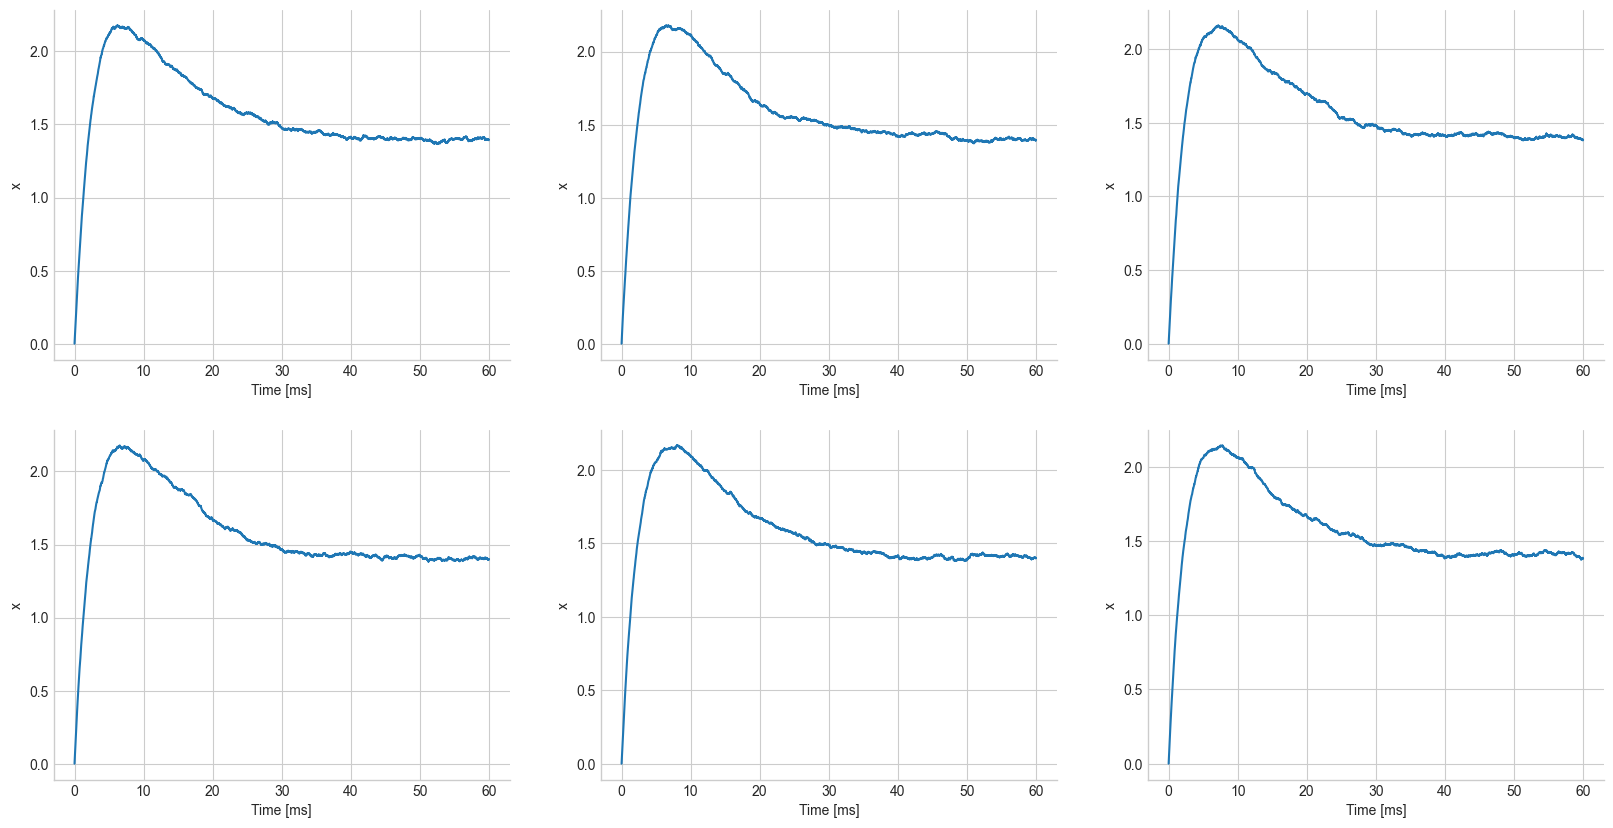

In [100]:
# Initial curve parameters
k1, k2, k3, k4, Ac, xi = 0.3875, 0.55, 0.03, 0.05, 1, 0

B = k1 + k4
C = k1*k4 + k2*k3
Q = k4
print(B**2 - 4*C)

k2_vals = np.random.uniform(0, 3, num_params)
k3_vals = (C - k1*k4)/k2_vals

x = np.empty([num_curves, t_shape])
y = np.empty([num_curves, t_shape])

for i in tqdm(range(num_params)):
    sol = solver(k1, k2_vals[i], k3_vals[i], k4, Ac, xi, c0, D)
    x[i] = sol[0]
    y[i] = sol[1]
    
# Plot X
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i in range(6):
    ax[i//3, i%3].plot(t, x[i])
    ax[i//3, i%3].set_xlabel('Time [ms]')
    ax[i//3, i%3].set_ylabel('x')